# Generating photon bursts

*FRETraj* predicts mean FRET efficiencies and distributions thereof for dynamic biomolecules as outlined in the
previous sections. FRET histograms of single-molecule experiments are often broadened due to shot-noise. 
For better comparison of *in vitro* and *in silico* FRET measurements, *FRETraj* can take the **photon noise** into account by simulating fluorescence emission events. The probabilities of donor and acceptor emission are dependent on the quantum yields and fluroescence lifetimes of the dyes as well as the transfer efficiency and thus the distance between their ACVs {cite}`Hoefling.2011, Hoefling.2013`.
This notebook show how to simulate **photon bursts** similar to a confocal single-molecule experiment.

In [1]:
import fretraj as ft
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

First, we load a parameter file for the burst simulation. The format of this file is described [here](../background/parameter_file.html#burst-simulation)

In [2]:
parameters = ft.burst.readParameters('burst_data/burst_parameters.json')
parameters

{'dyes': {'tauD': 1,
  'tauA': 1.4,
  'QD': 0.2,
  'QA': 0.2,
  'dipole_angle_abs_em': 10},
 'sampling': {'nbursts': 5000,
  'skipframesatstart': 0,
  'skipframesatend': 1000,
  'multiprocessing': True},
 'fret': {'R0': 5.4,
  'kappasquare': 0.6666,
  'no_gamma': False,
  'quenching_radius': 1},
 'species': {'name': ['all'],
  'unix_pattern_rkappa': ['R_kappa.dat'],
  'probability': [1],
  'n_trajectory_splits': None},
 'bursts': {'lower_limit': 15,
  'upper_limit': 150,
  'lambda': -2.3,
  'averaging': 'all',
  'QY_correction': False,
  'burst_size_file': None}}

Importantly, key `species.unix_pattern_rkappa` in the parameter file points to any file matching the given regular expression. Here, the file `R_kappa.dat` is created from a `ft.cloud.Trajectory` object (see [Working with Trajectories](trajectories.md)) and contains inter-dye distance $R_\text{DA}$(t) and $\kappa^2$ values.

In [3]:
pd.read_csv('burst_data/R_kappa.dat', sep='\t', names=['R_DA (nm)', 'kappasquare']).head()

,R_DA (nm),kappasquare
0.0,5.09,0.66
100.0,5.12,0.66
200.0,5.16,0.66
300.0,5.11,0.66
400.0,5.38,0.66


An analytical burst size distribution $P(x)$ is specified as a power law with a coefficient $\lambda$

$$P(x) = x^\lambda$$ 

Here we set the expoenent to $\lambda=-2.3$. We can now start a burst experiment.

In [4]:
experiment = ft.burst.Experiment('burst_data/', parameters)

Loading files...
Orientation independent R0_const = 5.8 A

              donor    acceptor
QY            0.20    0.20
tau (ns)      1.00    1.40
k_f (ns^-1)   0.20    0.14
k_ic (ns^-1)  0.80    0.57
              
Burst averaging method: all
Calculate anisotropy: no



Calculating bursts:   0%|          | 0/5000 [? s]

Combining burst...




average FRET efficiency: 0.56 +- 0.10



The resulting FRET histogram is broadened by shot-noise.

In [5]:
sns.set_style('white')
sns.set_context('notebook')

def set_ticksStyle(x_size=4, y_size=4, x_dir='in', y_dir='in'):
    sns.set_style('ticks', {'xtick.major.size': x_size, 'ytick.major.size': y_size, 'xtick.direction': x_dir, 'ytick.direction': y_dir})

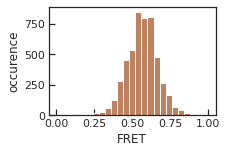

In [6]:
with sns.axes_style('ticks'):
    set_ticksStyle()
    f, ax=plt.subplots(nrows=1, ncols=1, figsize=(3, 2), sharex=True, sharey=True, squeeze=False)
    ax[0, 0].hist(experiment.FRETefficiencies, bins=25, range=[0, 1], color=[0.75, 0.51, 0.38])
    ax[0, 0].set_xlabel('FRET')
    ax[0, 0].set_ylabel('occurence')

Launch **Binder** 🚀 to interact with this notebook.